## Imports necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

Read Hurdat data (downloaded from https://www.aoml.noaa.gov/hrd/hurdat/hurdat2-nepac.html) 

In [2]:
df = pd.read_csv(r"D:\Users\mo314794\Downloads\hurdat2014-2022.csv")

In [3]:
df.head()

,y,m,D,H,Lat,Lon,Speed
0,AL01,20,14,NaN,RTHU,4.0,NaN
1,2014,6,28,18.0,32,78.2,20.0
2,2014,6,29,0.0,31.2,77.8,20.0
3,2014,6,29,6.0,30.5,77.4,20.0
4,2014,6,29,12.0,30,77.2,20.0


In [4]:
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'], errors='coerce')
df['track'] = pd.to_numeric(df['Lat'], errors='coerce').isna().cumsum()
df['Lon'] = df['Lon']*-1

In [5]:
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [6]:
grouped_gdf = gdf.groupby('track')

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, MultiPoint

# Read the CSV file
df = pd.read_csv(r"D:\Users\mo314794\Downloads\hurdat2014-2022.csv")

# Convert 'Lat' and 'Lon' columns to numeric, handle errors
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'], errors='coerce')

# Create 'track' column
df['track'] = pd.to_numeric(df['Lat'], errors='coerce').isna().cumsum()

# Reverse the sign of 'Lon'
df['Lon'] = df['Lon'] * -1
df = df.dropna(subset=['Lat', 'Lon'])
# Create Point geometries
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf = gdf[~gdf['geometry'].is_empty]
# Create MultiPoint geometries
multi_points = gdf.groupby('track')['geometry'].apply(lambda x: MultiPoint(list(x))).reset_index(name='geometry')

In [8]:
multi_points.to_csv(r"D:\Users\mo314794\OneDrive - University of Central Florida\hurdat_gpd_multipoint.csv")

In [9]:
gdf.to_csv(r"D:\Users\mo314794\Downloads\hurdat_gpd.csv")

In [10]:
data2 = pd.read_csv(r"D:\Users\mo314794\OneDrive - University of Central Florida\hurdat_gpd.csv")
data2.head()

,Unnamed: 0,y,m,D,H,Lat,Lon,Speed,name,track,geometry
0,0.0,AL01,20.0,14.0,NaN,NaN,-4.0,NaN,NaN,1.0,POINT (-4 NaN)
1,1.0,2014,6.0,28.0,18.0,32.0,-78.2,20.0,RTHU,1.0,POINT (-78.2 32)
2,2.0,2014,6.0,29.0,0.0,31.2,-77.8,20.0,32,1.0,POINT (-77.8 31.2)
3,3.0,2014,6.0,29.0,6.0,30.5,-77.4,20.0,31.2,1.0,POINT (-77.4 30.5)
4,4.0,2014,6.0,29.0,12.0,30.0,-77.2,20.0,30.5,1.0,POINT (-77.2 30)


In [11]:
data2 = data2.dropna(subset=['Lat', 'Lon'])
data2 = data2.rename(columns={'y': 'year', 'm': 'month', 'D': 'day', 'H': 'hour'})
data2['datetime'] = pd.to_datetime(data2[['year', 'month', 'day', 'hour']])
data2.to_csv(r"D:\Users\mo314794\OneDrive - University of Central Florida\hurdat_gpd_updated.csv")

D:\Users\mo314794\AppData\Local\Temp\2\ipykernel_11360\128869465.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Cannot find header.dxf (GDAL_DATA is not defined)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


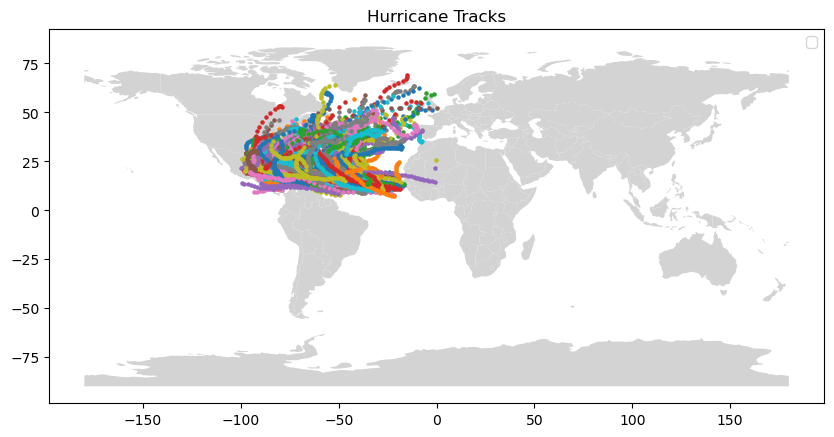

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')

for name, group in grouped_gdf:
    group.plot(ax=ax, linestyle='-', marker='o', markersize=5)

plt.title('Hurricane Tracks')
plt.legend()
plt.show()
# label=f'Track {name}',

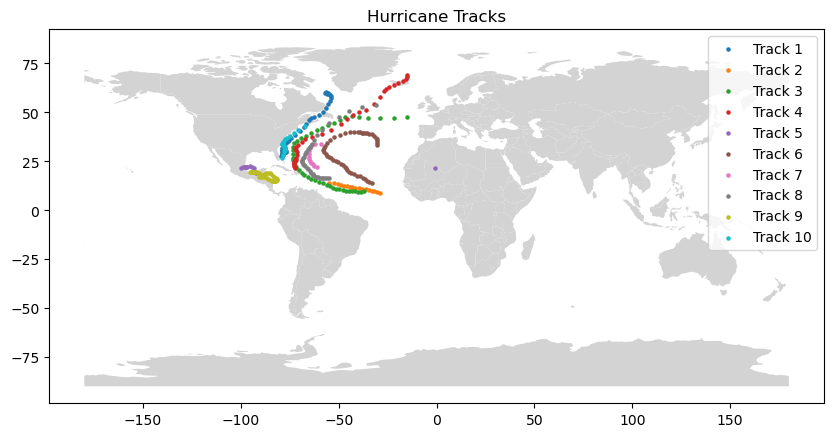

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')

count = 0  # Counter for the number of plotted tracks

for name, group in grouped_gdf:
    #group['lat'] = -group['lat']  # Invert latitude for the southern hemisphere
    group.plot(ax=ax, label=f'Track {name}', linestyle='-', marker='o', markersize=5)
    
    count += 1
    if count == 10:
        break  # Exit the loop after plotting the first 10 tracks

plt.title('Hurricane Tracks')
plt.legend()
plt.show()

In [41]:
df_points = pd.read_csv(r"D:\Users\mo314794\OneDrive - University of Central Florida\hurdat_gpd_updated.csv")
df_points

,Unnamed: 0.1,Unnamed: 0,year,month,day,hour,Lat,Lon,Speed,name,track,geometry,datetime
0,1,1.0,2014,6.0,28.0,18.0,32.0,-78.2,20.0,RTHU,1.0,POINT (-78.2 32),2014-06-28 18:00:00
1,2,2.0,2014,6.0,29.0,0.0,31.2,-77.8,20.0,32,1.0,POINT (-77.8 31.2),2014-06-29 00:00:00
2,3,3.0,2014,6.0,29.0,6.0,30.5,-77.4,20.0,31.2,1.0,POINT (-77.4 30.5),2014-06-29 06:00:00
3,4,4.0,2014,6.0,29.0,12.0,30.0,-77.2,20.0,30.5,1.0,POINT (-77.2 30),2014-06-29 12:00:00
4,5,5.0,2014,6.0,29.0,18.0,29.7,-77.2,25.0,30,1.0,POINT (-77.2 29.7),2014-06-29 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,5046,5046.0,2022,11.0,10.0,19.0,29.2,-83.0,40.0,29,159.0,POINT (-83 29.2),2022-11-10 19:00:00
4888,5047,5047.0,2022,11.0,11.0,0.0,30.1,-84.0,35.0,29.2,159.0,POINT (-84 30.1),2022-11-11 00:00:00
4889,5048,5048.0,2022,11.0,11.0,6.0,31.2,-84.6,30.0,30.1,159.0,POINT (-84.6 31.2),2022-11-11 06:00:00
4890,5049,5049.0,2022,11.0,11.0,12.0,33.2,-84.6,25.0,31.2,159.0,POINT (-84.6 33.2),2022-11-11 12:00:00


In [160]:
geo_data = gpd.read_file(r"D:\Users\mo314794\OneDrive - University of Central Florida\Florida_shp\Florida_county.shp")
geo_data = geo_data.to_crs(epsg=26917)
#geo_data.drop([27, 29],axis=0,inplace=True)

In [161]:
geo_data = geo_data[geo_data['NAME'].isin(['Dixie', 'Monroe'])]
print(geo_data)

   STATEFP COUNTYFP  COUNTYNS  GEOID    NAME       NAMELSAD LSAD CLASSFP  \
27      12      029  00295725  12029   Dixie   Dixie County   06      H1   
29      12      087  00295759  12087  Monroe  Monroe County   06      H1   

    MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND       AWATER  \
27  G4020  None   None     None        A  1826029565    876347537   
29  G4020   370  28580     None        A  2546067521  11153842007   

       INTPTLAT      INTPTLON  \
27  +29.5526748  -083.2362319   
29  +25.5861198  -081.0226025   

                                             geometry  
27  MULTIPOLYGON (((275318.356 3296073.020, 275348...  
29  MULTIPOLYGON (((482804.751 2760766.362, 482801...  


In [159]:
geo_data = geo_data[geo_data['NAME'].isin(['Dixie', 'Monroe'])]

# Extract geometries
geom = [g for geom in geo_data['geometry'] for g in geom.geoms]
# Extract the first polygon from each multipolygon geometry
geo_data['geometry'] = [geom.geoms[0] if geom.geom_type == 'MultiPolygon' else geom for geom in counties['geometry']]


In [155]:
geo_data

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
27,12,029,00295725,12029,Dixie,Dixie County,06,H1,G4020,None,None,None,A,1826029565,876347537,+29.5526748,-083.2362319,"POLYGON ((275318.356 3296073.020, 275348.899 3..."
29,12,087,00295759,12087,Monroe,Monroe County,06,H1,G4020,370,28580,None,A,2546067521,11153842007,+25.5861198,-081.0226025,"POLYGON ((482804.751 2760766.362, 482801.984 2..."


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

for index, county in geo_data.iterrows():
    county_name = geo_data["NAME"]

    # Select the current county from the GeoDataFrame
    gdf_polygons = geo_data[geo_data['NAME'] == county_name]
   
    print(gdf_polygons.crs)
    # Create GeoDataFrame for points
    geometry_points = [Point(xy) for xy in zip(df_points['Lon'], df_points['Lat'])]
    gdf_points = gpd.GeoDataFrame(df_points, geometry=geometry_points, crs='EPSG:4326')
    gdf_points = gdf_points.to_crs('EPSG:26917')
    print(gdf_points.crs)
    # Buffer around polygons
    buffer_distance = 500000  # in meters
    gdf_polygons_buffered = gdf_polygons.copy()
    gdf_polygons_buffered['geometry'] = gdf_polygons.buffer(buffer_distance)
    gdf_polygons_buffered = gdf_polygons_buffered.to_crs('EPSG:26917')
    print(gdf_polygons_buffered.crs)
    # Check if points are within the buffered polygons
    within_buffer = gpd.sjoin(gdf_points, gdf_polygons_buffered, predicate='within', how='left')

    # Filter rows where the join was successful (points within the buffer)
    filtered_data = within_buffer[~within_buffer['index_right'].isna()]

    # Extract datetime and Speed columns
    result = filtered_data[['datetime', 'Speed']]
    result.rename({'datetime': 'Time'}, axis =1, inplace = True)
    result['Time'] = pd.to_datetime(result['Time'])
    result.set_index('Time', inplace = True)
    result1 = result.resample('D').max()
    result1 = result1.fillna(0)
    result1 = result1.reset_index()
    # Save the result to a CSV file
    result1.to_csv(f"D:\\CoRELab\\Sam\\HURDAT2\\{county_name}_hurdat2.csv", index=False)
